In [1]:
import dropbox
import os
import numpy as np
import pandas as pd
from scipy.stats import t
import math
import collections
from PIL import Image
from dropbox import DropboxOAuth2FlowNoRedirect
import matplotlib.pyplot as plt
import cv2
import pypyodbc
import sys
import traceback
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import BatchNormalization, concatenate, Input, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical  #?
from keras.optimizers import Adam
from keras.metrics import categorical_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
y_train = np.load(open('train_tar_2.npy', 'rb'))
y_test = np.load(open('valid_tar_2.npy', 'rb'))
X_test = np.load(open('bottleneck_features_validation.npy', 'rb'))
test_codes = np.load(open('valid_codes.npy', 'rb'))
X_train = np.load(open('main_pic1.npy', 'rb'))
train_codes = np.load(open('main_codes.npy', 'rb'))

In [101]:
first = Input(shape=(2048,))

model = Dense(1024, activation='relu')(first)
model = Dropout(0.5)(model)
model = Dense(512, activation='relu')(model)
model = Dropout(0.5)(model)
model = Dense(256, activation='relu')(model)
model = Dropout(0.5)(model)
model = Dense(10, activation='softmax')(model)

model_ = Model(inputs=[first], outputs=model)

adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
history = model_.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Train on 41259 samples, validate on 4594 samples
Epoch 1/1000
41259/41259 [==============================] - 79s 2ms/step - loss: 1.8915 - acc: 0.3920 - val_loss: 1.7751 - val_acc: 0.4279
Epoch 2/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.7518 - acc: 0.4280 - val_loss: 1.7675 - val_acc: 0.4279
Epoch 3/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.7266 - acc: 0.4325 - val_loss: 1.7570 - val_acc: 0.4279
Epoch 4/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.7116 - acc: 0.4336 - val_loss: 1.7652 - val_acc: 0.4279
Epoch 5/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.7057 - acc: 0.4339 - val_loss: 1.7624 - val_acc: 0.4279
Epoch 6/1000
41259/41259 [==============================] - 73s 2ms/step - loss: 1.6955 - acc: 0.4343 - val_loss: 1.7605 - val_acc: 0.4279
Epoch 7/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.6861 - acc: 0.4343 - val_loss: 1.7

41259/41259 [==============================] - 72s 2ms/step - loss: 1.2376 - acc: 0.5185 - val_loss: 8.1597 - val_acc: 0.4229
Epoch 118/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.2386 - acc: 0.5187 - val_loss: 8.2240 - val_acc: 0.4240
Epoch 119/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.2326 - acc: 0.5222 - val_loss: 8.1198 - val_acc: 0.4216
Epoch 120/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.2262 - acc: 0.5198 - val_loss: 8.3200 - val_acc: 0.4212
Epoch 121/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.2283 - acc: 0.5210 - val_loss: 8.3163 - val_acc: 0.4232
Epoch 122/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.2349 - acc: 0.5199 - val_loss: 8.3835 - val_acc: 0.4242
Epoch 123/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.2184 - acc: 0.5220 - val_loss: 8.5605 - val_acc: 0.4238
Epoch 124/1000
41259/41259 [

41259/41259 [==============================] - 74s 2ms/step - loss: 1.0327 - acc: 0.5918 - val_loss: 9.0384 - val_acc: 0.4242
Epoch 234/1000
41259/41259 [==============================] - 73s 2ms/step - loss: 1.0393 - acc: 0.5884 - val_loss: 9.0118 - val_acc: 0.4201
Epoch 235/1000
41259/41259 [==============================] - 73s 2ms/step - loss: 1.0369 - acc: 0.5875 - val_loss: 9.0264 - val_acc: 0.4229
Epoch 236/1000
41259/41259 [==============================] - 73s 2ms/step - loss: 1.0371 - acc: 0.5898 - val_loss: 9.0722 - val_acc: 0.4227
Epoch 237/1000
41259/41259 [==============================] - 74s 2ms/step - loss: 1.0267 - acc: 0.5931 - val_loss: 9.0557 - val_acc: 0.4221
Epoch 238/1000
41259/41259 [==============================] - 74s 2ms/step - loss: 1.0334 - acc: 0.5933 - val_loss: 9.0397 - val_acc: 0.4212
Epoch 239/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 1.0235 - acc: 0.5918 - val_loss: 8.9925 - val_acc: 0.4212
Epoch 240/1000
41259/41259 [

41259/41259 [==============================] - 72s 2ms/step - loss: 0.9143 - acc: 0.6444 - val_loss: 9.1358 - val_acc: 0.4208
Epoch 350/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.9186 - acc: 0.6432 - val_loss: 9.1288 - val_acc: 0.4190
Epoch 351/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.9161 - acc: 0.6432 - val_loss: 9.1550 - val_acc: 0.4225
Epoch 352/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.9108 - acc: 0.6442 - val_loss: 9.1598 - val_acc: 0.4208
Epoch 353/1000
41259/41259 [==============================] - 71s 2ms/step - loss: 0.9129 - acc: 0.6414 - val_loss: 9.1536 - val_acc: 0.4234
Epoch 354/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.9202 - acc: 0.6404 - val_loss: 9.1565 - val_acc: 0.4240
Epoch 355/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.9074 - acc: 0.6472 - val_loss: 9.1716 - val_acc: 0.4242
Epoch 356/1000
41259/41259 [

41259/41259 [==============================] - 72s 2ms/step - loss: 0.8293 - acc: 0.6832 - val_loss: 9.1882 - val_acc: 0.4251
Epoch 466/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.8312 - acc: 0.6812 - val_loss: 9.1971 - val_acc: 0.4264
Epoch 467/1000
41259/41259 [==============================] - 71s 2ms/step - loss: 0.8433 - acc: 0.6723 - val_loss: 9.1958 - val_acc: 0.4236
Epoch 468/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.8345 - acc: 0.6790 - val_loss: 9.1912 - val_acc: 0.4238
Epoch 469/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.8290 - acc: 0.6843 - val_loss: 9.2052 - val_acc: 0.4238
Epoch 470/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.8318 - acc: 0.6773 - val_loss: 9.2015 - val_acc: 0.4232
Epoch 471/1000
41259/41259 [==============================] - 71s 2ms/step - loss: 0.8293 - acc: 0.6837 - val_loss: 9.1918 - val_acc: 0.4260
Epoch 472/1000
41259/41259 [

41259/41259 [==============================] - 72s 2ms/step - loss: 0.8008 - acc: 0.6958 - val_loss: 9.1973 - val_acc: 0.4260
Epoch 582/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7995 - acc: 0.6966 - val_loss: 9.1988 - val_acc: 0.4249
Epoch 583/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7986 - acc: 0.6981 - val_loss: 9.1817 - val_acc: 0.4256
Epoch 584/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7968 - acc: 0.7003 - val_loss: 9.1986 - val_acc: 0.4249
Epoch 585/1000
41259/41259 [==============================] - 71s 2ms/step - loss: 0.7866 - acc: 0.7019 - val_loss: 9.1986 - val_acc: 0.4258
Epoch 586/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.8045 - acc: 0.6944 - val_loss: 9.1867 - val_acc: 0.4264
Epoch 587/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.8057 - acc: 0.6949 - val_loss: 9.1954 - val_acc: 0.4258
Epoch 588/1000
41259/41259 [

41259/41259 [==============================] - 74s 2ms/step - loss: 0.7758 - acc: 0.7069 - val_loss: 9.1959 - val_acc: 0.4260
Epoch 698/1000
41259/41259 [==============================] - 74s 2ms/step - loss: 0.7747 - acc: 0.7062 - val_loss: 9.2094 - val_acc: 0.4249
Epoch 699/1000
41259/41259 [==============================] - 74s 2ms/step - loss: 0.7780 - acc: 0.7075 - val_loss: 9.2075 - val_acc: 0.4245
Epoch 700/1000
41259/41259 [==============================] - 75s 2ms/step - loss: 0.7808 - acc: 0.7058 - val_loss: 9.2080 - val_acc: 0.4236
Epoch 701/1000
41259/41259 [==============================] - 74s 2ms/step - loss: 0.7895 - acc: 0.7020 - val_loss: 9.2067 - val_acc: 0.4251
Epoch 702/1000
41259/41259 [==============================] - 74s 2ms/step - loss: 0.7816 - acc: 0.7051 - val_loss: 9.2165 - val_acc: 0.4249
Epoch 703/1000
41259/41259 [==============================] - 74s 2ms/step - loss: 0.7785 - acc: 0.7072 - val_loss: 9.2116 - val_acc: 0.4242
Epoch 704/1000
41259/41259 [

41259/41259 [==============================] - 72s 2ms/step - loss: 0.7707 - acc: 0.7119 - val_loss: 9.2116 - val_acc: 0.4247
Epoch 814/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7727 - acc: 0.7096 - val_loss: 9.2151 - val_acc: 0.4260
Epoch 815/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7700 - acc: 0.7087 - val_loss: 9.2202 - val_acc: 0.4260
Epoch 816/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7597 - acc: 0.7138 - val_loss: 9.2121 - val_acc: 0.4251
Epoch 817/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7704 - acc: 0.7107 - val_loss: 9.2193 - val_acc: 0.4249
Epoch 818/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7560 - acc: 0.7182 - val_loss: 9.2150 - val_acc: 0.4251
Epoch 819/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7432 - acc: 0.7215 - val_loss: 9.2094 - val_acc: 0.4251
Epoch 820/1000
41259/41259 [

41259/41259 [==============================] - 71s 2ms/step - loss: 0.7555 - acc: 0.7181 - val_loss: 9.2178 - val_acc: 0.4258
Epoch 930/1000
41259/41259 [==============================] - 71s 2ms/step - loss: 0.7558 - acc: 0.7175 - val_loss: 9.2109 - val_acc: 0.4264
Epoch 931/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7563 - acc: 0.7140 - val_loss: 9.2103 - val_acc: 0.4258
Epoch 932/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7473 - acc: 0.7196 - val_loss: 9.2036 - val_acc: 0.4251
Epoch 933/1000
41259/41259 [==============================] - 71s 2ms/step - loss: 0.7548 - acc: 0.7176 - val_loss: 9.2117 - val_acc: 0.4266
Epoch 934/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7603 - acc: 0.7160 - val_loss: 9.2102 - val_acc: 0.4258
Epoch 935/1000
41259/41259 [==============================] - 72s 2ms/step - loss: 0.7731 - acc: 0.7125 - val_loss: 9.2113 - val_acc: 0.4258
Epoch 936/1000
41259/41259 [

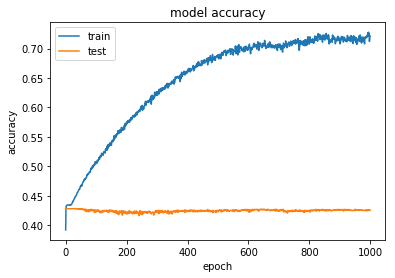

In [104]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model1.png', dpi=600)
plt.show()

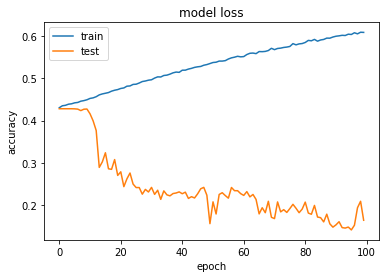

In [91]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model1.png', dpi=600)
plt.show()

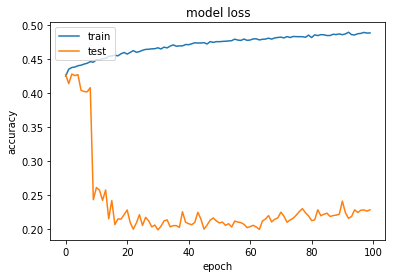

In [94]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('model1.png', dpi=600)
plt.show()

In [113]:
from keras.optimizers import SGD

first = Input(shape=(2048,))

model = Dense(1024, activation='relu')(first)
model = Dropout(0.5)(model)
model = Dense(512, activation='relu')(model)
model = Dropout(0.5)(model)
model = Dense(256, activation='relu')(model)
model = Dropout(0.5)(model)
model = Dense(10, activation='softmax')(model)

model_ = Model(inputs=[first], outputs=model)

sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model_.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [114]:
history2 = model_.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Train on 41259 samples, validate on 4594 samples
Epoch 1/1000
41259/41259 [==============================] - 48s 1ms/step - loss: 1.8227 - acc: 0.4131 - val_loss: 1.8387 - val_acc: 0.4279
Epoch 2/1000
41259/41259 [==============================] - 41s 986us/step - loss: 1.7310 - acc: 0.4341 - val_loss: 1.7828 - val_acc: 0.4279
Epoch 3/1000
41259/41259 [==============================] - 41s 988us/step - loss: 1.7154 - acc: 0.4343 - val_loss: 1.7645 - val_acc: 0.4279
Epoch 4/1000
41259/41259 [==============================] - 41s 988us/step - loss: 1.7048 - acc: 0.4343 - val_loss: 1.7647 - val_acc: 0.4279
Epoch 5/1000
41259/41259 [==============================] - 40s 979us/step - loss: 1.6976 - acc: 0.4343 - val_loss: 1.7584 - val_acc: 0.4279
Epoch 6/1000
41259/41259 [==============================] - 41s 990us/step - loss: 1.6890 - acc: 0.4343 - val_loss: 1.7532 - val_acc: 0.4279
Epoch 7/1000
41259/41259 [==============================] - 41s 986us/step - loss: 1.6842 - acc: 0.4343 - v

41259/41259 [==============================] - 40s 974us/step - loss: 1.2036 - acc: 0.5502 - val_loss: 4.6067 - val_acc: 0.3172
Epoch 116/1000
41259/41259 [==============================] - 40s 979us/step - loss: 1.1972 - acc: 0.5542 - val_loss: 4.8727 - val_acc: 0.3398
Epoch 117/1000
41259/41259 [==============================] - 40s 980us/step - loss: 1.1941 - acc: 0.5536 - val_loss: 4.9721 - val_acc: 0.3080
Epoch 118/1000
41259/41259 [==============================] - 40s 981us/step - loss: 1.1886 - acc: 0.5555 - val_loss: 5.0274 - val_acc: 0.3004
Epoch 119/1000
41259/41259 [==============================] - 40s 974us/step - loss: 1.1830 - acc: 0.5580 - val_loss: 5.0502 - val_acc: 0.2936
Epoch 120/1000
41259/41259 [==============================] - 40s 973us/step - loss: 1.1802 - acc: 0.5556 - val_loss: 5.0057 - val_acc: 0.3182
Epoch 121/1000
41259/41259 [==============================] - 40s 979us/step - loss: 1.1707 - acc: 0.5597 - val_loss: 5.4911 - val_acc: 0.3193
Epoch 122/1000

41259/41259 [==============================] - 41s 1ms/step - loss: 0.8087 - acc: 0.6950 - val_loss: 7.5539 - val_acc: 0.3901
Epoch 230/1000
41259/41259 [==============================] - 41s 997us/step - loss: 0.8088 - acc: 0.6970 - val_loss: 7.6893 - val_acc: 0.3955
Epoch 231/1000
41259/41259 [==============================] - 41s 994us/step - loss: 0.8034 - acc: 0.6984 - val_loss: 7.8986 - val_acc: 0.4062
Epoch 232/1000
41259/41259 [==============================] - 41s 1ms/step - loss: 0.8008 - acc: 0.6983 - val_loss: 7.5154 - val_acc: 0.3672
Epoch 233/1000
41259/41259 [==============================] - 42s 1ms/step - loss: 0.7888 - acc: 0.7014 - val_loss: 7.5577 - val_acc: 0.3822
Epoch 234/1000
41259/41259 [==============================] - 41s 1ms/step - loss: 0.7882 - acc: 0.7039 - val_loss: 7.6870 - val_acc: 0.3916
Epoch 235/1000
41259/41259 [==============================] - 42s 1ms/step - loss: 0.7854 - acc: 0.7023 - val_loss: 7.5801 - val_acc: 0.3583
Epoch 236/1000
41259/412

41259/41259 [==============================] - 40s 977us/step - loss: 0.5776 - acc: 0.7882 - val_loss: 8.6926 - val_acc: 0.4153
Epoch 344/1000
41259/41259 [==============================] - 40s 973us/step - loss: 0.5734 - acc: 0.7898 - val_loss: 8.5204 - val_acc: 0.4123
Epoch 345/1000
41259/41259 [==============================] - 40s 974us/step - loss: 0.5772 - acc: 0.7877 - val_loss: 8.7573 - val_acc: 0.4164
Epoch 346/1000
41259/41259 [==============================] - 40s 977us/step - loss: 0.5686 - acc: 0.7897 - val_loss: 8.5880 - val_acc: 0.4149
Epoch 347/1000
41259/41259 [==============================] - 40s 977us/step - loss: 0.5780 - acc: 0.7863 - val_loss: 8.4265 - val_acc: 0.4138
Epoch 348/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.5767 - acc: 0.7843 - val_loss: 8.7133 - val_acc: 0.4179
Epoch 349/1000
41259/41259 [==============================] - 40s 967us/step - loss: 0.5743 - acc: 0.7896 - val_loss: 8.6427 - val_acc: 0.4192
Epoch 350/1000

41259/41259 [==============================] - 40s 975us/step - loss: 0.4410 - acc: 0.8401 - val_loss: 8.9857 - val_acc: 0.4173
Epoch 458/1000
41259/41259 [==============================] - 40s 981us/step - loss: 0.4379 - acc: 0.8403 - val_loss: 9.0628 - val_acc: 0.4214
Epoch 459/1000
41259/41259 [==============================] - 40s 977us/step - loss: 0.4348 - acc: 0.8420 - val_loss: 8.9539 - val_acc: 0.4166
Epoch 460/1000
41259/41259 [==============================] - 40s 978us/step - loss: 0.4375 - acc: 0.8406 - val_loss: 8.9644 - val_acc: 0.4162
Epoch 461/1000
41259/41259 [==============================] - 40s 973us/step - loss: 0.4341 - acc: 0.8433 - val_loss: 8.8895 - val_acc: 0.4158
Epoch 462/1000
41259/41259 [==============================] - 41s 985us/step - loss: 0.4387 - acc: 0.8427 - val_loss: 9.0832 - val_acc: 0.4223
Epoch 463/1000
41259/41259 [==============================] - 40s 981us/step - loss: 0.4349 - acc: 0.8411 - val_loss: 8.7975 - val_acc: 0.4136
Epoch 464/1000

41259/41259 [==============================] - 40s 980us/step - loss: 0.3497 - acc: 0.8738 - val_loss: 9.1038 - val_acc: 0.4212
Epoch 572/1000
41259/41259 [==============================] - 40s 977us/step - loss: 0.3459 - acc: 0.8754 - val_loss: 9.0748 - val_acc: 0.4208
Epoch 573/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.3556 - acc: 0.8742 - val_loss: 9.0739 - val_acc: 0.4205
Epoch 574/1000
41259/41259 [==============================] - 40s 973us/step - loss: 0.3530 - acc: 0.8757 - val_loss: 9.0550 - val_acc: 0.4192
Epoch 575/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.3513 - acc: 0.8737 - val_loss: 9.0385 - val_acc: 0.4175
Epoch 576/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.3564 - acc: 0.8750 - val_loss: 9.0804 - val_acc: 0.4186
Epoch 577/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.3559 - acc: 0.8724 - val_loss: 9.1156 - val_acc: 0.4214
Epoch 578/1000

41259/41259 [==============================] - 40s 971us/step - loss: 0.3033 - acc: 0.8912 - val_loss: 9.0941 - val_acc: 0.4175
Epoch 686/1000
41259/41259 [==============================] - 40s 974us/step - loss: 0.2890 - acc: 0.8983 - val_loss: 9.1127 - val_acc: 0.4182
Epoch 687/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.2930 - acc: 0.8972 - val_loss: 9.1363 - val_acc: 0.4197
Epoch 688/1000
41259/41259 [==============================] - 40s 978us/step - loss: 0.2897 - acc: 0.8978 - val_loss: 9.0940 - val_acc: 0.4199
Epoch 689/1000
41259/41259 [==============================] - 40s 975us/step - loss: 0.3046 - acc: 0.8923 - val_loss: 9.1101 - val_acc: 0.4164
Epoch 690/1000
41259/41259 [==============================] - 40s 974us/step - loss: 0.2994 - acc: 0.8951 - val_loss: 9.0671 - val_acc: 0.4186
Epoch 691/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.2887 - acc: 0.8968 - val_loss: 9.1323 - val_acc: 0.4195
Epoch 692/1000

41259/41259 [==============================] - 40s 971us/step - loss: 0.2455 - acc: 0.9141 - val_loss: 9.1837 - val_acc: 0.4234
Epoch 800/1000
41259/41259 [==============================] - 40s 975us/step - loss: 0.2494 - acc: 0.9123 - val_loss: 9.1578 - val_acc: 0.4208
Epoch 801/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.2479 - acc: 0.9131 - val_loss: 9.1850 - val_acc: 0.4232
Epoch 802/1000
41259/41259 [==============================] - 40s 976us/step - loss: 0.2488 - acc: 0.9132 - val_loss: 9.1639 - val_acc: 0.4216
Epoch 803/1000
41259/41259 [==============================] - 40s 980us/step - loss: 0.2396 - acc: 0.9157 - val_loss: 9.1912 - val_acc: 0.4240
Epoch 804/1000
41259/41259 [==============================] - 40s 972us/step - loss: 0.2464 - acc: 0.9130 - val_loss: 9.1903 - val_acc: 0.4232
Epoch 805/1000
41259/41259 [==============================] - 40s 976us/step - loss: 0.2447 - acc: 0.9145 - val_loss: 9.1659 - val_acc: 0.4221
Epoch 806/1000

41259/41259 [==============================] - 41s 983us/step - loss: 0.2273 - acc: 0.9200 - val_loss: 9.1664 - val_acc: 0.4216
Epoch 914/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.2207 - acc: 0.9240 - val_loss: 9.1733 - val_acc: 0.4195
Epoch 915/1000
41259/41259 [==============================] - 40s 974us/step - loss: 0.2244 - acc: 0.9222 - val_loss: 9.1736 - val_acc: 0.4190
Epoch 916/1000
41259/41259 [==============================] - 40s 972us/step - loss: 0.2281 - acc: 0.9208 - val_loss: 9.1724 - val_acc: 0.4219
Epoch 917/1000
41259/41259 [==============================] - 41s 984us/step - loss: 0.2243 - acc: 0.9210 - val_loss: 9.1785 - val_acc: 0.4229
Epoch 918/1000
41259/41259 [==============================] - 40s 979us/step - loss: 0.2222 - acc: 0.9240 - val_loss: 9.1691 - val_acc: 0.4190
Epoch 919/1000
41259/41259 [==============================] - 40s 978us/step - loss: 0.2267 - acc: 0.9215 - val_loss: 9.1787 - val_acc: 0.4221
Epoch 920/1000

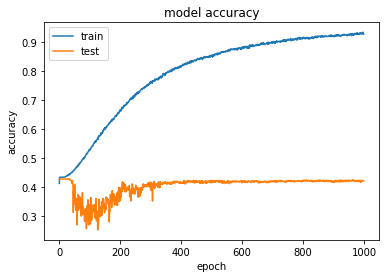

In [115]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_sgd01.png', dpi=600)
plt.show()

In [119]:
history3 = model_.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400)

Train on 41259 samples, validate on 4594 samples
Epoch 1/400
41259/41259 [==============================] - 40s 972us/step - loss: 0.1365 - acc: 0.9552 - val_loss: 9.1999 - val_acc: 0.4240
Epoch 2/400
41259/41259 [==============================] - 40s 974us/step - loss: 0.1402 - acc: 0.9534 - val_loss: 9.2008 - val_acc: 0.4232
Epoch 3/400
41259/41259 [==============================] - 40s 976us/step - loss: 0.1279 - acc: 0.9565 - val_loss: 9.1978 - val_acc: 0.4240
Epoch 4/400
41259/41259 [==============================] - 40s 969us/step - loss: 0.1324 - acc: 0.9555 - val_loss: 9.2059 - val_acc: 0.4236
Epoch 5/400
41259/41259 [==============================] - 40s 969us/step - loss: 0.1409 - acc: 0.9522 - val_loss: 9.1936 - val_acc: 0.4227
Epoch 6/400
41259/41259 [==============================] - 40s 967us/step - loss: 0.1361 - acc: 0.9544 - val_loss: 9.1929 - val_acc: 0.4249
Epoch 7/400
41259/41259 [==============================] - 40s 963us/step - loss: 0.1294 - acc: 0.9561 - val_lo

Epoch 59/400
41259/41259 [==============================] - 40s 980us/step - loss: 0.1265 - acc: 0.9566 - val_loss: 9.2082 - val_acc: 0.4249
Epoch 60/400
41259/41259 [==============================] - 41s 983us/step - loss: 0.1279 - acc: 0.9576 - val_loss: 9.2099 - val_acc: 0.4240
Epoch 61/400
41259/41259 [==============================] - 41s 982us/step - loss: 0.1219 - acc: 0.9592 - val_loss: 9.2126 - val_acc: 0.4242
Epoch 62/400
41259/41259 [==============================] - 40s 976us/step - loss: 0.1295 - acc: 0.9562 - val_loss: 9.2095 - val_acc: 0.4240
Epoch 63/400
41259/41259 [==============================] - 40s 979us/step - loss: 0.1289 - acc: 0.9563 - val_loss: 9.2073 - val_acc: 0.4242
Epoch 64/400
41259/41259 [==============================] - 40s 981us/step - loss: 0.1291 - acc: 0.9575 - val_loss: 9.2015 - val_acc: 0.4242
Epoch 65/400
41259/41259 [==============================] - 41s 983us/step - loss: 0.1237 - acc: 0.9584 - val_loss: 9.2039 - val_acc: 0.4242
Epoch 66/400


KeyboardInterrupt: 

In [123]:
from sklearn.metrics import confusion_matrix

pred1 = model_.predict(X_train)
pred2 = model_.predict(X_test)

y_train_pred = pred1.argmax(axis=-1)
y_test_pred = pred2.argmax(axis=-1)

m1 = confusion_matrix(y_test.argmax(axis=-1), y_test_pred)

In [124]:
m2 = confusion_matrix(y_train.argmax(axis=-1), y_train_pred)

In [126]:
pd.DataFrame(m2)

,0,1,2,3,4,5,6,7,8,9
0,17865,46,7,2,0,0,0,0,0,0
1,0,8497,38,1,1,0,0,0,1,0
2,0,0,3967,3,0,0,0,0,0,0
3,0,0,0,2746,1,0,0,1,2,0
4,0,0,0,7,2299,1,0,0,0,0
5,0,0,0,1,0,1082,0,1,3,0
6,0,0,0,12,0,0,936,0,7,0
7,0,0,0,1,1,7,1,554,16,1
8,0,0,0,0,0,0,0,4,240,0
9,0,0,0,0,13,1,13,14,0,2866


In [127]:
pd.DataFrame(m1)

,0,1,2,3,4,5,6,7,8,9
0,1933,33,0,0,0,0,0,0,0,0
1,906,8,0,0,0,0,0,0,0,0
2,463,3,0,0,0,0,0,0,0,0
3,304,3,0,0,0,0,0,0,0,0
4,268,3,0,0,0,0,0,0,0,0
5,112,0,0,0,0,0,0,0,0,0
6,122,1,0,0,0,0,0,0,0,0
7,73,0,0,0,0,0,0,0,0,0
8,28,0,0,0,0,0,0,0,0,0
9,334,0,0,0,0,0,0,0,0,0


In [133]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train.argmax(axis=-1)), y_train.argmax(axis=-1))
class_weight_dict = dict(enumerate(class_weights))

In [134]:
class_weight_dict

{0: 0.23023995535714287,
 1: 0.48323963457484187,
 2: 1.0392695214105794,
 3: 1.5003272727272727,
 4: 1.7884265279583875,
 5: 3.795676172953082,
 6: 4.3203141361256545,
 7: 7.101376936316695,
 8: 16.909426229508195,
 9: 1.419298245614035}

In [118]:
timestr = time.strftime("%Y%m%d-%H%M%S")
model_.save('model'+timestr+'.h5')

optioncode u xceptiona sokup X_trainle uyusmasina bak//

In [83]:
code = train_codes[317]

In [84]:
speci_train = X_train[317,:]

In [77]:
access_token='0DQLcsXIojcAAAAAAAgybeB3DOmXKK7bRTLyYwkthbrAiGmpQR4AuGINQkjBXhif'
dbx = dropbox.Dropbox(access_token)

retrieved_image_df = pd.read_excel('C:/Users/Recep/Koton/Data/retrieved_image_list.xlsx', sheet_name='Sheet1')

In [85]:
    bn_model = Xception(include_top=False, weights='imagenet', pooling='max')
              
            
    im_index = retrieved_image_df.loc[code.upper()]['image1'+'_index']
    if (math.isnan(float(im_index))==False):
        filename = str(code.lower()) +'_'+'image1'+'_'+str(int(im_index))+'.jpg'
        path = '/Koton_Image_Files/'+filename
        
        md, res = dbx.files_download(path)
        temp_pic = cv2.cvtColor(cv2.resize(cv2.imdecode(np.frombuffer(res.content, dtype=np.uint8), -1), (299,299)), cv2.COLOR_BGR2RGB)
        valid_pic1 = preprocess_input(np.array(temp_pic))
        speci_y2 = bn_model.predict(valid_pic1.reshape(1, 299, 299, 3))
        

In [88]:
(speci_y2-speci_train).sum()

1.1920929e-07

In [86]:
(speci_y-speci_y2).sum()

0.0